In [1]:
#importar las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#importar el csv de ndemandas
df=pd.read_csv(r"..\Dataset limpios\demanda_dataset.csv")


In [4]:
df.rename(columns={"Unnamed: 0":"fecha"}, inplace=True)

In [5]:
df=df.set_index(df["fecha"])

In [6]:
df=df.iloc[:,1:]
print("shape is:",df.shape)

shape is: (187, 38)


In [7]:
df.index=pd.to_datetime(df.index)

In [8]:
df

,AL,AR,AZ,CA,CO,CT,FL,GA,HI,IA,...,OR,PA,RI,SC,TN,TX,UT,VA,WA,WI
fecha,,,,,,,,,,,,,,,,,,,,,
2008-02-29,618.0,572.0,3334.0,10637.0,2808.0,2329.0,9236.0,4071.0,613.0,481.0,...,1613.0,5321.0,644.0,1696.0,3112.0,7544.0,1436.0,4292.0,2279.0,1029.0
2008-03-31,800.0,663.0,3975.0,13144.0,3476.0,3080.0,10878.0,4381.0,770.0,496.0,...,1892.0,6451.0,836.0,2014.0,3596.0,8744.0,1659.0,5125.0,2695.0,1363.0
2008-04-30,818.0,688.0,4431.0,16200.0,3978.0,3335.0,11801.0,4483.0,859.0,659.0,...,1863.0,7324.0,912.0,2120.0,3746.0,9400.0,1846.0,5680.0,2848.0,1640.0
2008-05-31,873.0,799.0,4680.0,17989.0,4418.0,3977.0,12056.0,4735.0,762.0,729.0,...,2096.0,7788.0,1093.0,2266.0,4075.0,10431.0,1976.0,6002.0,2947.0,1966.0
2008-06-30,926.0,774.0,4419.0,18491.0,4688.0,4726.0,11985.0,4962.0,659.0,768.0,...,2062.0,8753.0,1173.0,2348.0,4103.0,10662.0,2003.0,6872.0,3049.0,2217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30,1064.0,676.0,6758.0,17451.0,4502.0,1946.0,21383.0,6156.0,546.0,526.0,...,2002.0,7220.0,874.0,2816.0,4251.0,10448.0,1805.0,7325.0,2938.0,1446.0
2023-05-31,1273.0,805.0,8015.0,21256.0,5415.0,2362.0,24171.0,6981.0,607.0,545.0,...,2342.0,8444.0,1077.0,3357.0,5432.0,12896.0,2114.0,9017.0,3358.0,1876.0
2023-06-30,1194.0,881.0,7128.0,20573.0,5543.0,3081.0,22844.0,6862.0,645.0,598.0,...,2519.0,9801.0,1303.0,3505.0,5468.0,12548.0,2092.0,9144.0,3503.0,2145.0


revisar la estacionalidad con la prueba ADF

In [11]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest=adfuller(dataset,autolag="AIC")
  results = {
        "ADF": dftest[0],
        "P-Value": dftest[1],
        "Num of Lags": dftest[2],
        "Num of Observations used": dftest[3],
        "Critical Values": dftest[4]
    }
  return results



In [12]:
ad_test(df["OH"])

{'ADF': -1.6702533237210626,
 'P-Value': 0.4465003264565674,
 'Num of Lags': 14,
 'Num of Observations used': 172,
 'Critical Values': {'1%': -3.468952197801766,
  '5%': -2.878495056473015,
  '10%': -2.57580913601947}}

In [13]:
for column in df.columns:
    result = ad_test(df[column])
    p_value = result["P-Value"]
    if p_value < 0.05:
        print(f"Columna: {column}")
        print("1.ADF:", result["ADF"])
        print("2.PVALUE:", p_value)
        print("3.NUM OF LAGS:", result["Num of Lags"])
        print("4.N° OBS USED FOR ADF REG and CRITICAL VALUES CALCULATION:", result["Num of Observations used"])
        print("5.CRITICAL VALUES:")
        for key, val in result["Critical Values"].items():
            print("\t", key, ":", val)
        print("los datos son estacionarios en el estado:", column)

los datos no son estacionales, habra que utilizar otro modelo de ml

In [14]:
df1=df[["AL"]]
df1

,AL
fecha,
2008-02-29,618.0
2008-03-31,800.0
2008-04-30,818.0
2008-05-31,873.0
2008-06-30,926.0
...,...
2023-04-30,1064.0
2023-05-31,1273.0
2023-06-30,1194.0


<AxesSubplot: xlabel='fecha'>

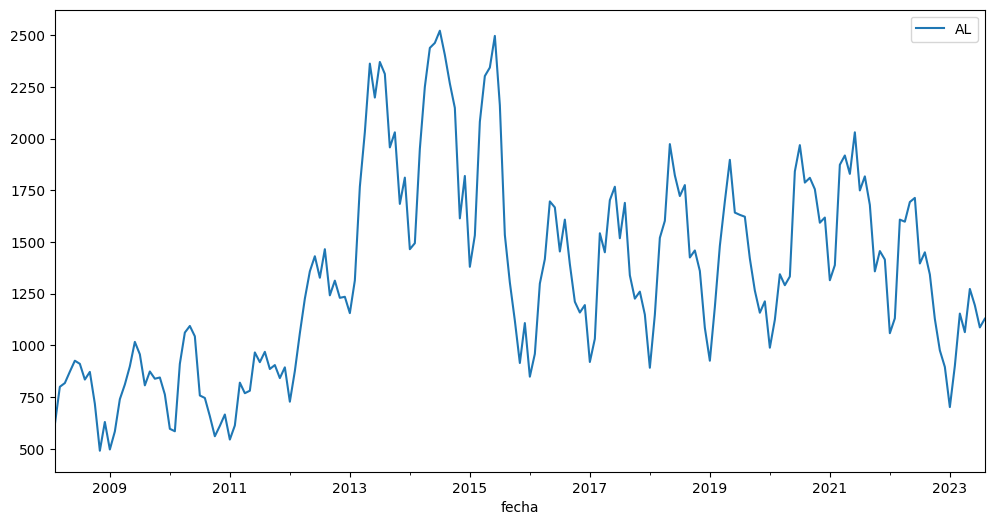

In [15]:
df1.plot(figsize=(12,6))

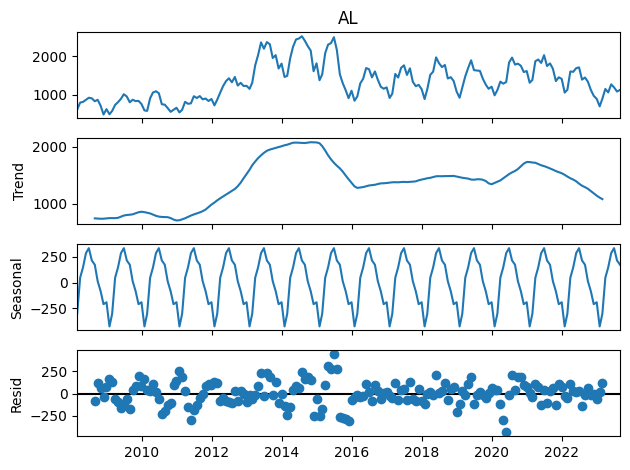

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

results = seasonal_decompose(df1['AL'])
results.plot();

In [17]:
train=df1.loc[df.index<"2020-08-31"]
test=df1.loc[df.index>="2020-08-31"]


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [19]:
df1.head(),df1.tail()

(               AL
 fecha            
 2008-02-29  618.0
 2008-03-31  800.0
 2008-04-30  818.0
 2008-05-31  873.0
 2008-06-30  926.0,
                 AL
 fecha             
 2023-04-30  1064.0
 2023-05-31  1273.0
 2023-06-30  1194.0
 2023-07-31  1087.0
 2023-08-31  1129.0)

In [20]:

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:

scaled_train[:10]

array([[0.06256158],
       [0.15221675],
       [0.16108374],
       [0.18817734],
       [0.21428571],
       [0.20689655],
       [0.16945813],
       [0.18768473],
       [0.11182266],
       [0.        ]])

In [28]:
from keras.preprocessing.sequence import TimeseriesGenerator

# define generator
n_input = 6
n_features = 1
generator1 = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:

X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.06256158 0.15221675 0.16108374 0.18817734 0.21428571 0.20689655]
Predict this y: 
 [[0.16945813]]


In [ ]:
X.shape

(1, 6, 1)

In [137]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [138]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [139]:
# define model
model = Sequential()
model.add(LSTM(600, activation='relu', input_shape=(n_input, n_features)))#cambie el tlst de 100 a 1000
model.add(Dense(1))#cambio de 1 a 3
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
# fit model
model.fit(generator,epochs=15)

Epoch 1/15
138/138 [==============================] - 10s 57ms/step - loss: 0.0421
Epoch 2/15
138/138 [==============================] - 9s 63ms/step - loss: 0.0298
Epoch 3/15
138/138 [==============================] - 8s 57ms/step - loss: 0.0310
Epoch 4/15
138/138 [==============================] - 8s 60ms/step - loss: 0.0261
Epoch 5/15
138/138 [==============================] - 8s 59ms/step - loss: 0.0184
Epoch 6/15
138/138 [==============================] - 8s 58ms/step - loss: 0.0160
Epoch 7/15
138/138 [==============================] - 8s 55ms/step - loss: 0.0184
Epoch 8/15
138/138 [==============================] - 9s 63ms/step - loss: 0.0187
Epoch 9/15
138/138 [==============================] - 9s 62ms/step - loss: 0.0131
Epoch 10/15
138/138 [==============================] - 8s 57ms/step - loss: 0.0134
Epoch 11/15
138/138 [==============================] - 9s 64ms/step - loss: 0.0106
Epoch 12/15
138/138 [==============================] - 9s 64ms/step - loss: 0.0109
Epoch 13/15


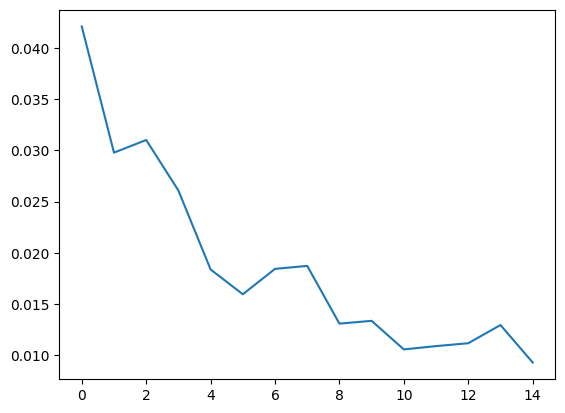

In [141]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [142]:
last_train_batch = scaled_train[-12:]

In [143]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [144]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 227ms/step


array([[0.6457945]], dtype=float32)

In [145]:
scaled_test[0]

array([0.63842365])

In [146]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)



1/1 [==============================] - 0s 35ms/step


In [147]:
test_predictions

[array([0.6457945], dtype=float32),
 array([0.5881007], dtype=float32),
 array([0.49050754], dtype=float32),
 array([0.38259092], dtype=float32),
 array([0.2918209], dtype=float32),
 array([0.2294446], dtype=float32),
 array([0.21033382], dtype=float32),
 array([0.2242873], dtype=float32),
 array([0.24956901], dtype=float32),
 array([0.2929139], dtype=float32),
 array([0.35604748], dtype=float32),
 array([0.404654], dtype=float32),
 array([0.43023804], dtype=float32),
 array([0.43119776], dtype=float32),
 array([0.4043166], dtype=float32),
 array([0.35910612], dtype=float32),
 array([0.30703825], dtype=float32),
 array([0.25753447], dtype=float32),
 array([0.21959111], dtype=float32),
 array([0.19961411], dtype=float32),
 array([0.19681771], dtype=float32),
 array([0.20975833], dtype=float32),
 array([0.23460947], dtype=float32),
 array([0.263708], dtype=float32),
 array([0.2902374], dtype=float32),
 array([0.3085185], dtype=float32),
 array([0.31320292], dtype=float32),
 array([0.3035

In [148]:
test.head()

,AL
fecha,
2020-08-31,1787.0
2020-09-30,1810.0
2020-10-31,1755.0
2020-11-30,1593.0
2020-12-31,1618.0


In [149]:

true_predictions = scaler.inverse_transform(test_predictions)

In [150]:
test['Predictions'] = true_predictions

<ipython-input-150-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='fecha'>

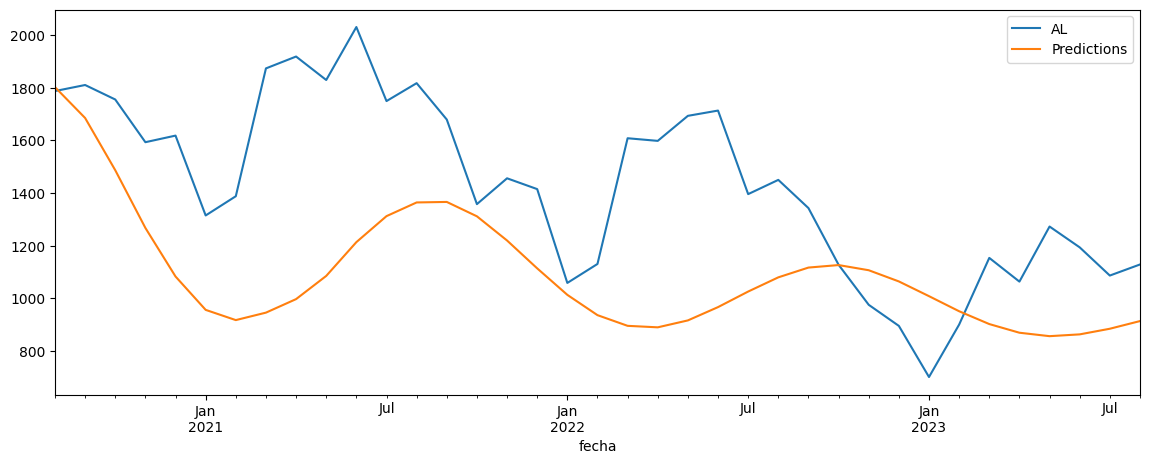

In [151]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['AL'],test['Predictions']))
print(rmse)

861.1206989540597


In [ ]:
# fit model
model.fit(generator,epochs=15)
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)